# CRTVeto on BNB samples

## Imports

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
scalar_keys = [b'_run', b'_subrun', b'_event', 
               b'_nflashes_in_beamgate', b'_nflashes_in_beamgate_passing_beamspill_and_PE_cuts', 
               b'_beam_flash_time', b'_beam_flash_PE', b'_nCRThits_in_event', 
               b'_CRT_hit_time', b'_CRT_hit_PE', b'_CRT_hit_x', b'_CRT_hit_y', b'_CRT_hit_z', 
               #b'CRT_hits_time', b'CRT_hits_PE', b'CRT_hits_x', b'CRT_hits_y', b'CRT_hits_z', 
               b'_dt', b'_within_resolution']

## Convert ROOT TTrees to Pandas dataframes 

In [3]:
beamON = uproot.open('input/beamON_new.root')['ubcrt']['_tree']
beamON = pd.DataFrame.from_dict(beamON.arrays(scalar_keys))
beamON.columns = [x.decode('ascii') for x in beamON.columns]
beamON.head()

,_CRT_hit_PE,_CRT_hit_time,_CRT_hit_x,_CRT_hit_y,_CRT_hit_z,_beam_flash_PE,_beam_flash_time,_dt,_event,_nCRThits_in_event,_nflashes_in_beamgate,_nflashes_in_beamgate_passing_beamspill_and_PE_cuts,_run,_subrun,_within_resolution
0,202.929138,3.957,393.015991,50.278156,219.010193,113.824153,3.706250,-0.250750,76,110,1,1,15427,1,1
1,185.715790,4.700,272.124115,658.250000,912.335144,1803.037115,4.611250,-0.088750,82,120,1,1,15427,1,1
2,185.715790,-1929.368,272.124115,658.250000,912.335144,-1.000000,-10000.000000,-8070.632000,90,107,1,0,15427,1,0
3,185.715790,-1915.433,272.124115,658.250000,912.335144,-1.000000,-10000.000000,-8084.567000,91,134,1,0,15427,1,0
4,281.014130,4.884,393.265991,-208.151611,306.850647,76.201755,4.803125,-0.080875,96,97,1,1,15427,1,1


In [4]:
beamOFF = uproot.open('input/beamOFF_new.root')['ubcrt']['_tree']
beamOFF = pd.DataFrame.from_dict(beamOFF.arrays(scalar_keys))
beamOFF.columns = [x.decode('ascii') for x in beamOFF.columns]
beamOFF.head()

,_CRT_hit_PE,_CRT_hit_time,_CRT_hit_x,_CRT_hit_y,_CRT_hit_z,_beam_flash_PE,_beam_flash_time,_dt,_event,_nCRThits_in_event,_nflashes_in_beamgate,_nflashes_in_beamgate_passing_beamspill_and_PE_cuts,_run,_subrun,_within_resolution
0,176.858734,4.117,-24.237959,658.250000,1084.567627,1143.358970,4.279375,0.162375,92,118,1,1,15427,1,1
1,135.076706,4.486,123.688095,-261.605988,454.305420,1145.632287,4.231250,-0.254750,219,110,1,1,15427,4,1
2,135.076706,-30.843,123.688095,-261.605988,454.305420,3128.756467,3.961250,34.804250,223,115,1,1,15427,4,0
3,135.076706,5.139,123.688095,-261.605988,454.305420,108.806438,3.743125,-1.395875,765,139,1,1,15427,15,0
4,342.184479,3.892,-142.483994,-189.724396,713.234009,428.654664,3.851250,-0.040750,775,119,1,1,15427,15,1


## Fraction vetoed by the CRT-Flash matching

In [5]:
# Percentage events with a CRT-Flash match:
print('Vetoed in Beam ON:\t{0:.2f}%.'.format(sum(beamON['_within_resolution'])/len(beamON['_within_resolution'])*100))
print('Vetoed in Beam OFF:\t{0:.2f}%.'.format(sum(beamOFF['_within_resolution'])/len(beamOFF['_within_resolution'])*100))

Vetoed in Beam ON:	40.32%.
Vetoed in Beam OFF:	32.39%.


In [6]:
# Check if all vtoed events did have a valid flash:
beamOFF.query('_within_resolution==1')['_nflashes_in_beamgate_passing_beamspill_and_PE_cuts'].value_counts()
beamON.query('_within_resolution==1')['_nflashes_in_beamgate_passing_beamspill_and_PE_cuts'].value_counts()

1    19395
Name: _nflashes_in_beamgate_passing_beamspill_and_PE_cuts, dtype: int64

In [7]:
# Percentage vetoed that do have a valid flash:
beamOFF_valifflash = beamOFF.query('_nflashes_in_beamgate_passing_beamspill_and_PE_cuts>0')
beamON_valifflash = beamON.query('_nflashes_in_beamgate_passing_beamspill_and_PE_cuts>0')
print('Vetoed in Beam ON:\t{0:.2f}%.'.format(sum(beamON_valifflash['_within_resolution'])/len(beamON_valifflash['_within_resolution'])*100))
print('Vetoed in Beam OFF:\t{0:.2f}%.'.format(sum(beamOFF_valifflash['_within_resolution'])/len(beamOFF_valifflash['_within_resolution'])*100))

Vetoed in Beam ON:	64.77%.
Vetoed in Beam OFF:	52.70%.


## Plots

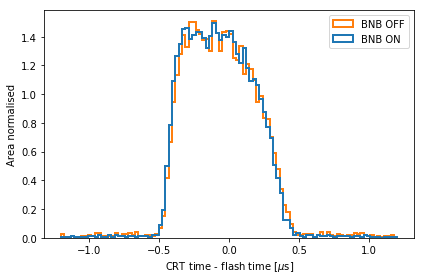

In [13]:
labels = ['BNB ON','BNB OFF']

plt.hist([beamON['_dt'] , beamOFF['_dt']],range=(-1.2,1.2), lw=2 
         ,bins=100, histtype='step', density=1, label=labels)
plt.xlabel(r'CRT time - flash time [$\mu$s]')
plt.ylabel('Area normalised')
plt.legend()
plt.tight_layout()
plt.savefig("./output/data_time_diff.pdf", bbox_inches="tight")

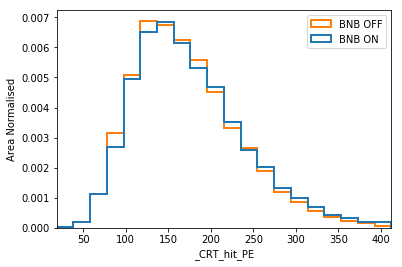

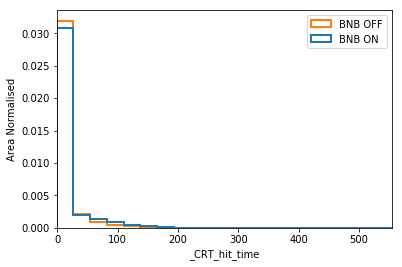

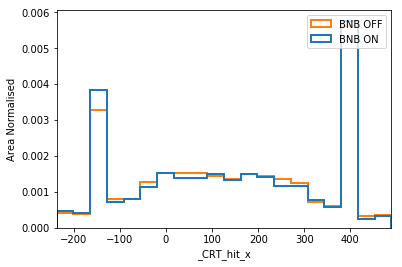

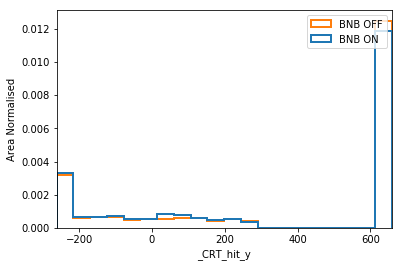

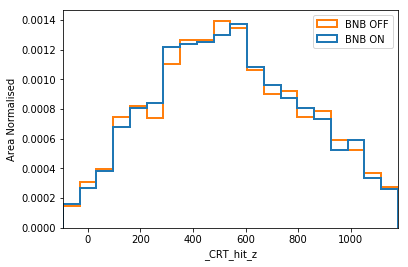

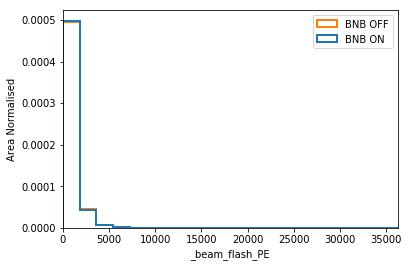

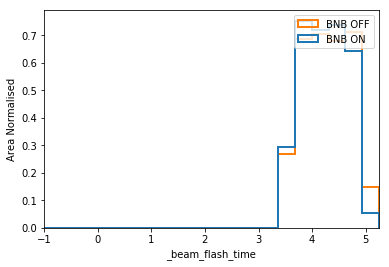

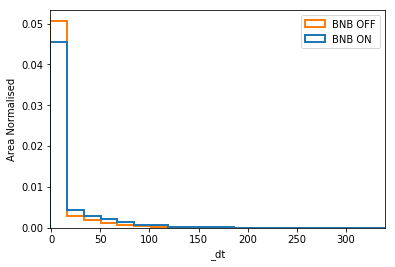

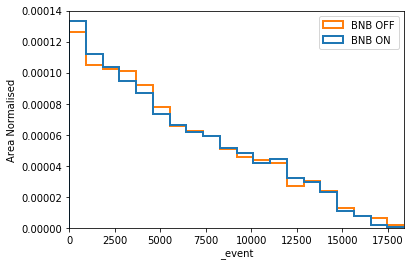

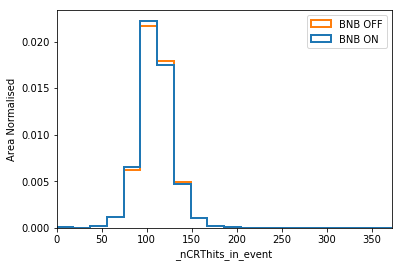

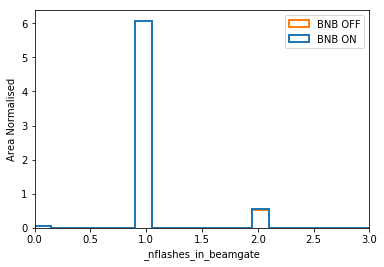

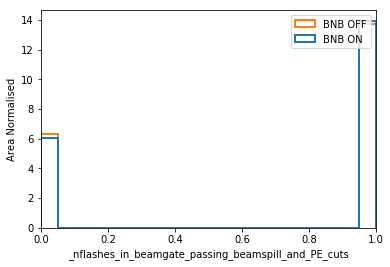

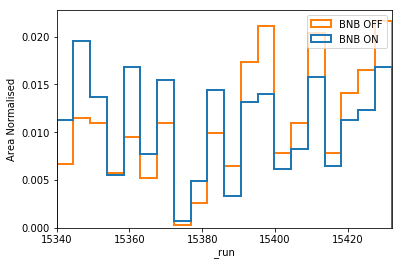

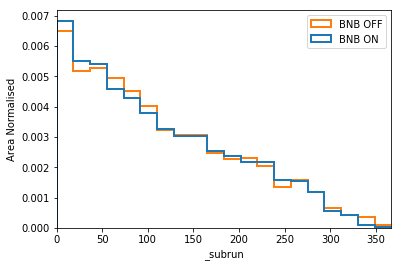

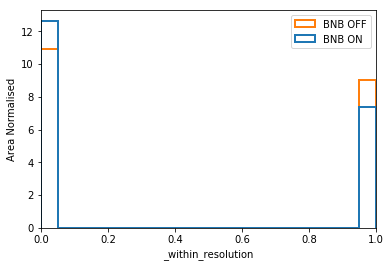

In [7]:
labels = ['BNB ON','BNB OFF']

for key in beamOFF.columns:
    x_min = min(beamON[key])
    if x_min < -900:
        x_min=-1     # Trick to avoid default large negative values to mess up plots
    x_max = max(beamON[key])
    plt.hist([beamON[key] , beamOFF[key]],range=(x_min,x_max)
             ,bins=20, histtype='step', lw=2, density=1, label=labels)
    plt.ylabel('Area Normalised')
    plt.xlabel(key)
    plt.xlim(x_min,x_max)
    plt.legend(loc=0)
    plt.show()